In [1]:
import functools
import jax
import os
import html

from datetime import datetime
from jax import numpy as jp
jax.config.update("jax_debug_nans", False)
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

from IPython.display import HTML, clear_output, display

import flax
from brax import envs
from brax.io import model
from brax.io import json
from brax.io import html

import shutil

from src.pods.Pods import train as train_pods
from src.hds.Hds import train as train_hds
from src.env.Pendulum import InvertedPendulum
import pickle




In [2]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
print(jax.devices())

gpu
[cuda(id=0)]


In [3]:
env = InvertedPendulum(target=jp.array([1]))
state = jax.jit(env.reset)(rng=jax.random.PRNGKey(seed=0))

#HTML(html.render(env.sys, [state.pipeline_state]))

In [4]:
ckpt_dir = './tmp/flax_ckpt'

if os.path.exists(ckpt_dir):
    shutil.rmtree(ckpt_dir)  # Remove any existing checkpoints from the last notebook run.

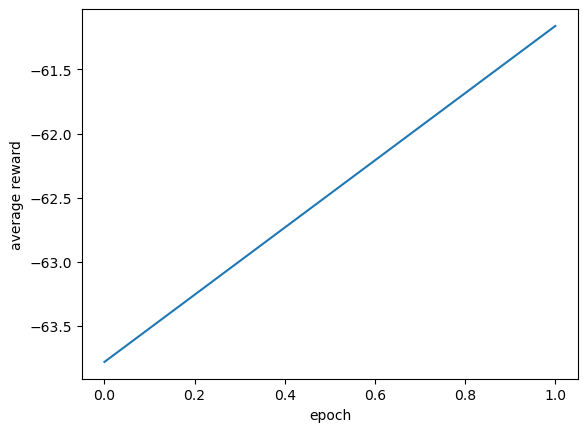

In [5]:

def progress_f(x_data,y_data,epoch,reward):
    print(reward)
    x_data.append(epoch)
    y_data.append(reward)
    clear_output(wait=True)
    plt.xlabel('epoch')
    plt.ylabel('average reward')
    plt.plot(x_data, y_data)
    plt.show()

policy = train_hds(env,trajectory_length=100 ,num_samples=50,epochs=100, inner_epochs=20, alpha_a=1e-3, init_learning_rate=8e-4, init_noise=0.1, noise_decay=0.5, lambda_policy_update=0.0, progress_fn=progress_f)
# policy = train_pods(env,trajectory_length=100 ,num_samples=100,epochs=20, alpha_a=5e-5, progress_fn=progress_f)

In [ ]:
f = open("reward.txt", "w")
g = open("actions.txt", "w")
inference_fn = policy()
rollout = []
rng = jax.random.PRNGKey(seed=1)
state = env.reset(rng=rng)
reward = []
actions = []
for _ in range(1000):
  rollout.append(state.pipeline_state)
  act_rng, rng = jax.random.split(rng)
  #print(state.obs)
  act = inference_fn(state.obs)
  print(act)
  reward.append(state.reward)
  state = env.step(state, act)
  #print(state.reward)
  actions.append(act)

  
print(reward, file=f)
print(actions, file=g)

[0.01666713]
[0.01994321]
[0.03161524]
[0.04213389]
[0.10418444]
[0.21509182]
[0.30532458]
[0.39635227]
[0.5105899]
[0.6051521]
[0.64083032]
[0.63782414]
[0.6255569]
[0.60009425]
[0.57656237]
[0.5569689]
[0.53576292]
[0.53524839]
[0.54036707]
[0.54646641]
[0.5588421]
[0.56585741]
[0.56627567]
[0.56570115]
[0.5615562]
[0.56085595]
[0.56669157]
[0.57141883]
[0.5782901]
[0.58452821]
[0.59072582]
[0.58144156]
[0.57154567]
[0.56947699]
[0.58640518]
[0.60328199]
[0.61410984]
[0.61860076]
[0.62378304]
[0.62501446]
[0.62565386]
[0.62677133]
[0.62837834]
[0.62988885]
[0.63126666]
[0.63079691]
[0.62990611]
[0.62304035]
[0.61375862]
[0.60332527]
[0.59172166]
[0.06344869]
[0.06966743]
[0.08012354]
[0.09075858]
[0.10506083]
[0.12329944]
[0.14504016]
[0.16934489]
[0.20237017]
[0.2100564]
[0.21356205]
[0.22450982]
[0.22508399]
[0.20555311]
[0.19175296]
[0.19395169]
[0.21013633]
[0.23061189]
[0.25554509]
[0.2846099]
[0.28842028]
[0.28573834]
[0.28192175]
[0.26543994]
[0.24723088]
[0.23649987]
[0.22644

In [ ]:

yes=html.render(env.sys.replace(dt=env.dt), rollout)
with open("data.html", "w") as file:
    file.write(yes)